# Descriptive plots of Data 

In [1]:
from src.data.dataset_utils import read_ns5_file
from src.data.preprocess_utils import bin_data
from matplotlib import pyplot as plt 
from scipy.signal import find_peaks 
from scipy.signal import welch
import numpy as np
import seaborn as sns 

sns.set_theme()

rcParams = {
    "font.family": "serif",  # use serif/main font for text elements
    'text.usetex': True,
    'font.size': 8,
    'axes.labelsize': 7,
    'axes.titlesize': 9,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6,
    'legend.fontsize': 7,
    'axes.labelpad': 1,
    'axes.axisbelow': True,  # draw gridlines below other elements
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
    "pgf.preamble": "\n".join([
        r"\usepackage{url}",            # load additional packages
        r"\usepackage{amsmath,amssymb}",   # unicode math setup
        #  r"\setmainfont{DejaVu Serif}",  # serif font via preamble
    ])
}
plt.rcParams.update(rcParams)

figdir = "../../../figures/data/"
def savefig(fig, name, width=6, height=4):
    # apply rcParams
    fig.set_size_inches(width, height)
    fig.savefig(figdir + name + ".pdf", bbox_inches='tight')

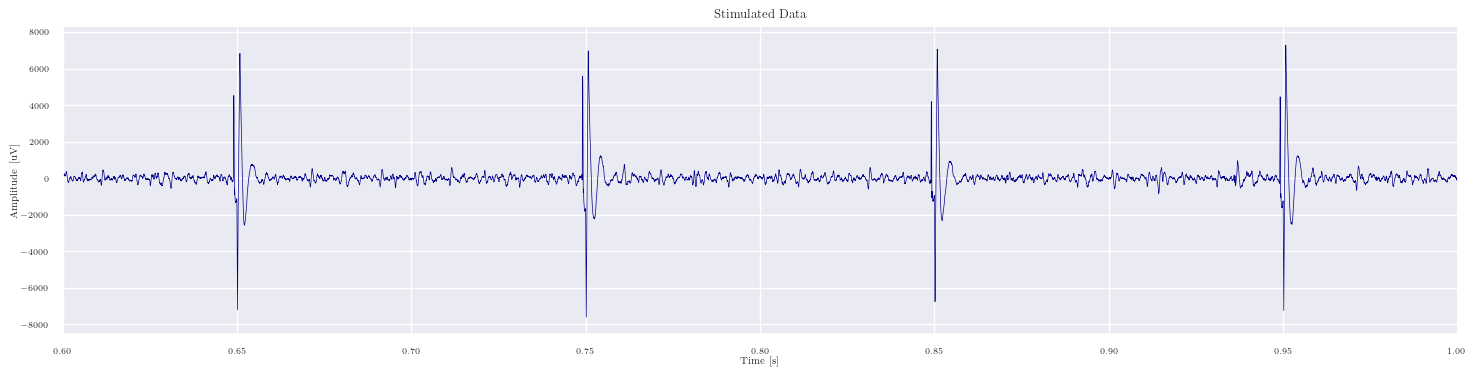

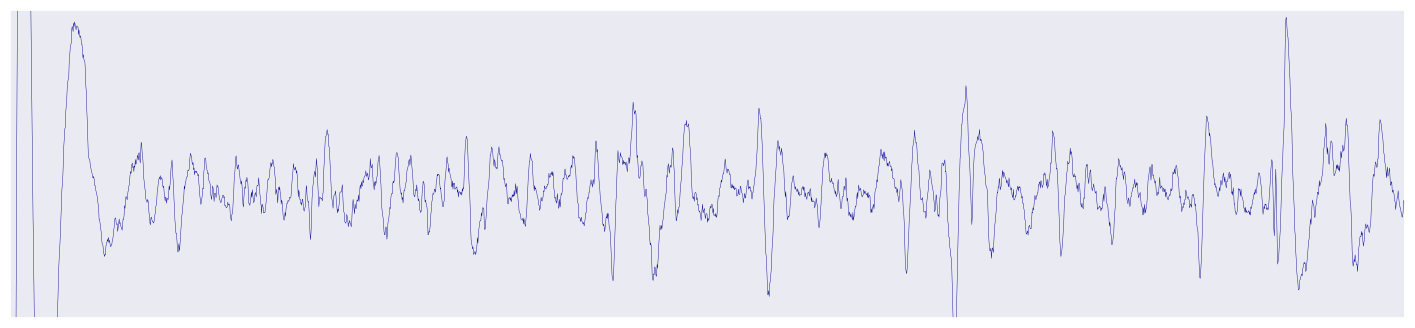

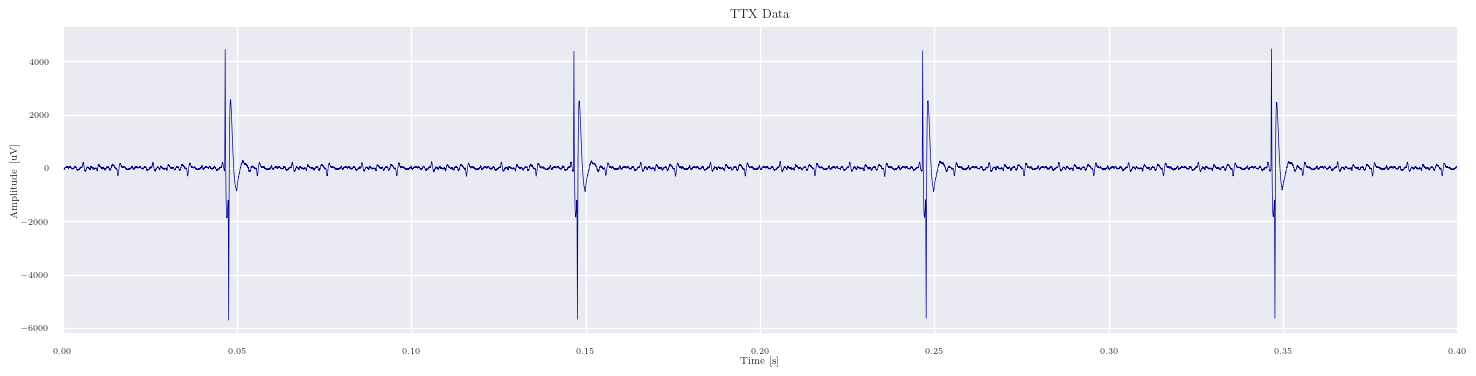

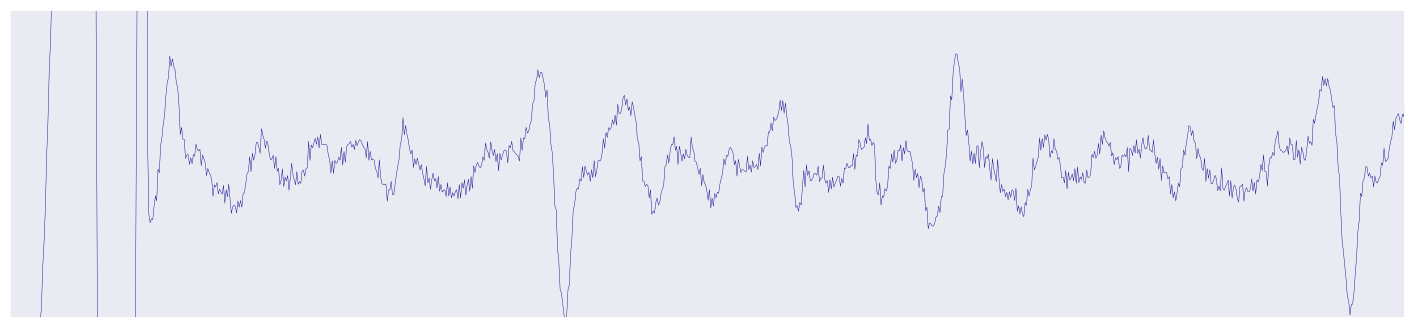

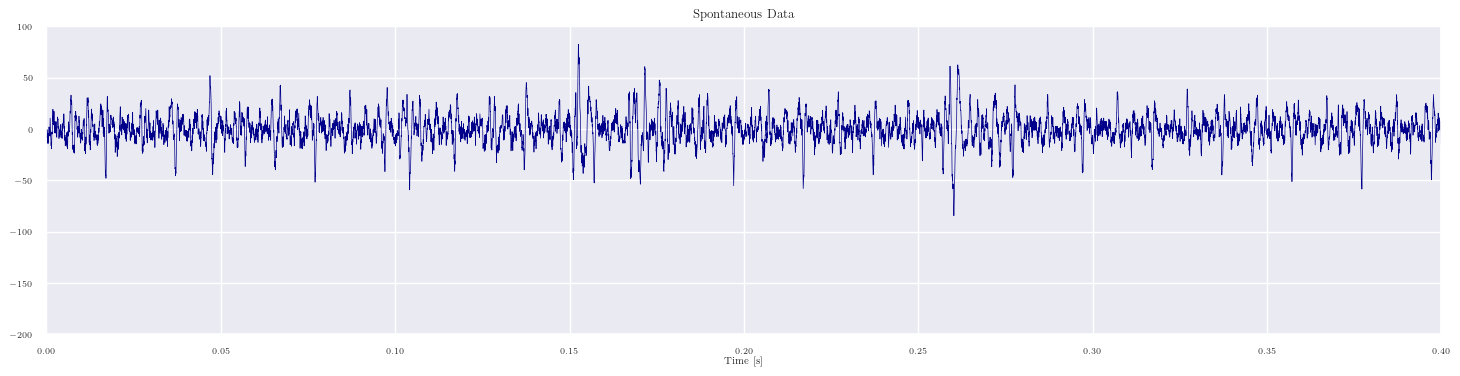

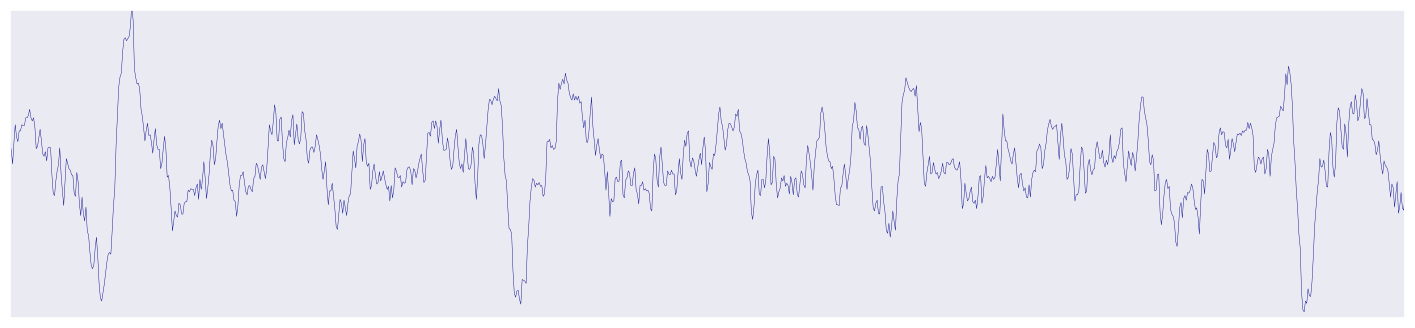

In [2]:
# read data  
times, stim = read_ns5_file("../../data/raw/3D/Eye 6/10Hz_1V_neg500mV_1ms011.ns5")
_, ttx = read_ns5_file("../../data/raw/3D/Eye 6/10Hz_1V_neg500mV_1ms_TTX012.ns5")
_, spon = read_ns5_file("../../data/raw/3D/Eye 6/NO_STIM_NO_GEN007.ns5")

# define channel 
channel = 1 

fig, ax = plt.subplots(1, 1, figsize = (18, 4))
plt.plot(times, stim[:, channel], color = "darkblue", linewidth = 0.5)
plt.xlim([0.6, 1])
plt.title("Stimulated Data")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [uV]")
plt.show()

savefig(fig, "stimulated_data", width = 6, height = 2)

fig, ax = plt.subplots(1, 1, figsize = (18, 4))
plt.plot(times, stim[:, channel], color = "darkblue", linewidth = 0.3)
plt.xlim([0.85, 0.945])
plt.ylim([-700, 1000])
plt.xticks([])
plt.yticks([])
plt.show()

savefig(fig, "stimulated_data_zoom", width = 2.5, height = 0.35)


fig, ax = plt.subplots(1, 1, figsize = (18, 4))
plt.plot(times, ttx[:, channel], color = "darkblue", linewidth = 0.5)
plt.xlim([0, 0.4])
plt.title("TTX Data")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [uV]")
plt.show()

savefig(fig, "ttx_data", width = 6, height = 2)


fig, ax = plt.subplots(1, 1, figsize = (18, 4))
plt.plot(times, ttx[:, channel], color = "darkblue", linewidth = 0.3)
plt.xlim([0.05, 0.0145])
plt.ylim([-300, 300])
plt.xticks([])
plt.yticks([])
plt.show()

savefig(fig, "ttx_data_zoom", width = 2.5, height = 0.35)

fig, ax = plt.subplots(1, 1, figsize = (18, 4))
plt.plot(times, spon[:, channel], color = "darkblue", linewidth = 0.5)
plt.xlim([0, 0.4])
plt.ylim([-200, 100])
plt.title("Spontaneous Data")
plt.xlabel("Time [s]")
plt.show()

savefig(fig, "spon_data", width = 6, height = 2)


fig, ax = plt.subplots(1, 1, figsize = (18, 4))
plt.plot(times, spon[:, channel], color = "darkblue", linewidth = 0.3)
plt.xlim([0.05, 0.0145])
plt.ylim([-50, 50])
plt.xticks([])
plt.yticks([])
plt.show()

savefig(fig, "spon_data_zoom", width = 2.5, height = 0.35)

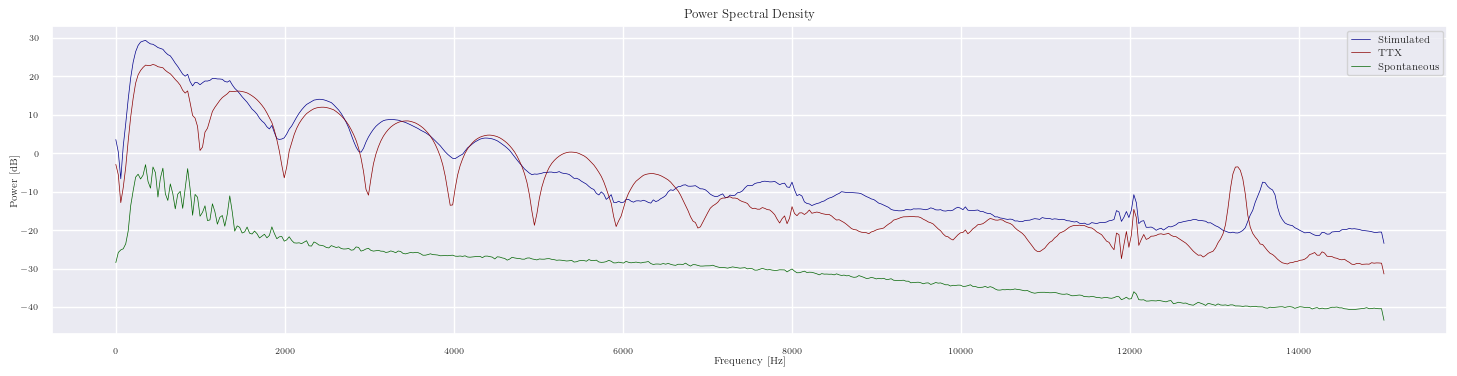

In [76]:
f_stim, P_stim = welch(stim[:, channel], fs = 30000, nperseg = 1024)
f_ttx, P_ttx = welch(ttx[:, channel], fs = 30000, nperseg = 1024)
f_spon, P_spon = welch(spon[:, channel], fs = 30000, nperseg = 1024)

fig, ax = plt.subplots(1, 1, figsize = (18, 4))
plt.plot(f_stim, 10*np.log10(P_stim), color = "darkblue", label = "Stimulated", linewidth = 0.5)
plt.plot(f_ttx, 10*np.log10(P_ttx), color = "darkred", label = "TTX", linewidth = 0.5)
plt.plot(f_spon, 10*np.log10(P_spon), color = "darkgreen", label = "Spontaneous", linewidth = 0.5)
plt.title("Power Spectral Density")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power [dB]")
plt.legend()
plt.show()

savefig(fig, "data_psd", width = 6, height = 2)


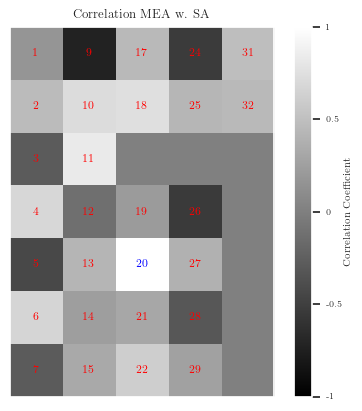

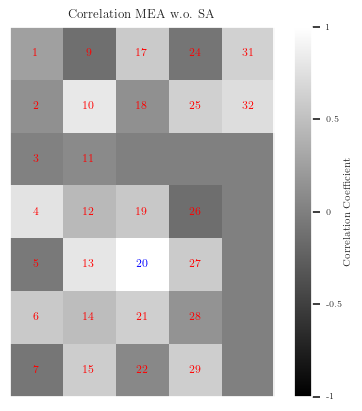

In [46]:
def plot_corr_mea(layout : np.ndarray, correlations : np.ndarray, title : str) -> plt.figure:
    fig = plt.figure()
    im = plt.imshow(correlations, cmap="gray", vmin = -1, vmax = 1)
    plt.title(title)

    # Add the MEA layout indices on the plot
    for i in range(7):  
        for j in range(5): 
            if not np.isnan(layout[i, j]):  # Check for valid indices
                color = 'blue' if (i==4) & (j==2) else 'red'
                plt.text(
                    j,  # x-coordinate
                    i,  # y-coordinate
                    str(int(layout[i, j] + 1)),  # Channel number (1-indexed)
                    ha='center', va='center', color=color, fontsize=8, weight='bold'
                )
    cbar = plt.colorbar(im, fraction=0.065, pad=0.04)
    cbar.set_label("Correlation Coefficient")

    # Customize colorbar ticks
    cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
    cbar.set_ticklabels(['-1', '-0.5', '0', '0.5', '1'])
    plt.xticks([])
    plt.yticks([])
    plt.show()
    return fig

times, data = read_ns5_file("../../data/raw/3D/Eye 4/10Hz_1V_neg500mV_1ms018.ns5")
channel = 19

MEA_layout = np.array([
    [1, 9, 17, 24, 31],
    [2, 10, 18, 25, 32],
    [3, 11, np.nan, np.nan, np.nan],
    [4, 12, 19, 26, np.nan],
    [5, 13, 20, 27, np.nan],
    [6, 14, 21, 28, np.nan],
    [7, 15, 22, 29, np.nan],
]) - 1 

# compute correlation from channel 0 to all other channels
correlation = np.zeros((7, 5))
for i in range(7):
    for j in range(5):
        if not np.isnan(MEA_layout[i, j]):
            correlation[i, j] = np.corrcoef(data[:, channel], data[:, int(MEA_layout[i, j])])[0, 1]

fig = plot_corr_mea(MEA_layout, correlation, "Correlation MEA w. SA")
savefig(fig, "MEA_corr_SA", width = 2, height = 3.5)

correlation = np.zeros((7, 5))
for i in range(7):
    for j in range(5):
        if not np.isnan(MEA_layout[i, j]):
            bins1 = bin_data(data[:, channel], find_peaks(data[:, channel], height=300, distance = 2900)[0]).ravel()
            bins2 = bin_data(data[:, int(MEA_layout[i, j])], find_peaks(data[:, int(MEA_layout[i, j])], height=300, distance = 2900)[0]).ravel()
            correlation[i, j] = np.corrcoef(bins1, bins2)[0, 1]

fig = plot_corr_mea(MEA_layout, correlation, "Correlation MEA w.o. SA")
savefig(fig, "MEA_corr_no_SA", width = 2, height = 3.5)



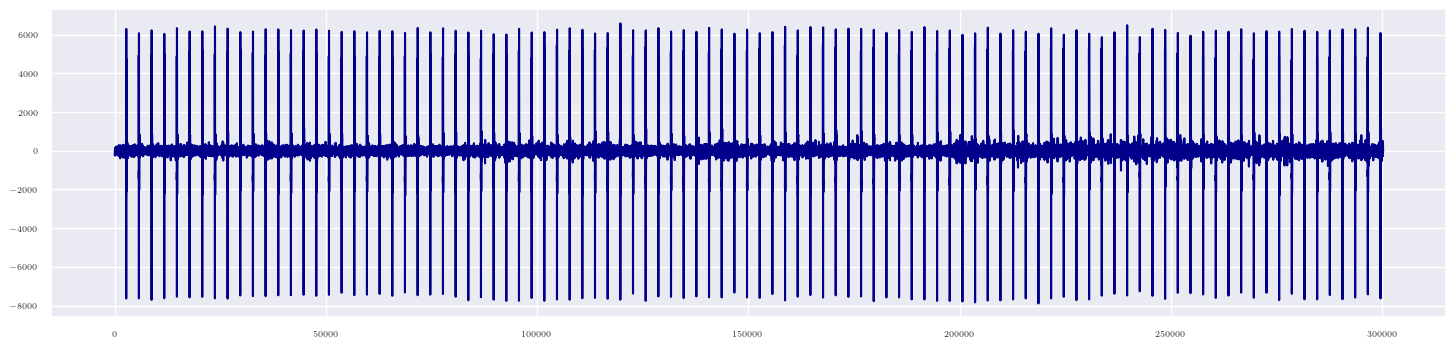

In [29]:
plt.figure(figsize = (18, 4))
plt.plot(data[:, int(MEA_layout[i-1, j-1])], color = "darkblue")
plt.show()